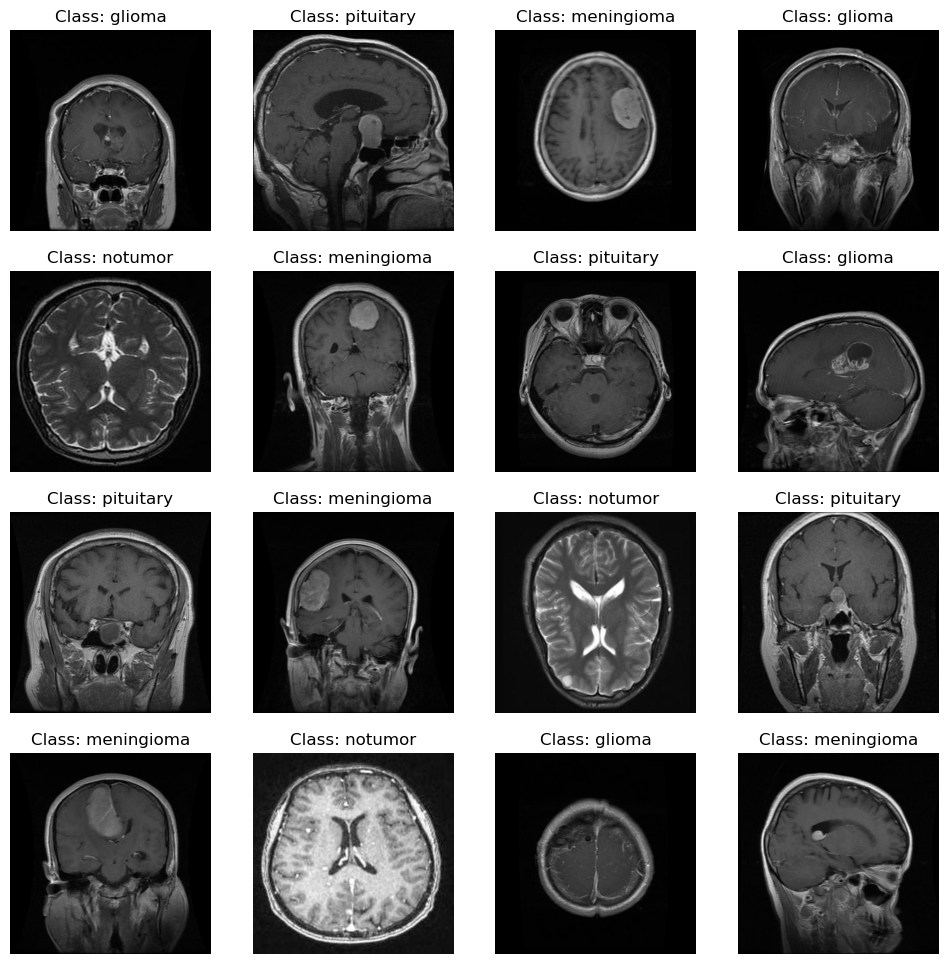

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms.functional import to_pil_image

data_dir = 'Data/Training'

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

dataset = ImageFolder(root=data_dir, transform=transform)

idx_to_class = {idx: cls for cls, idx in dataset.class_to_idx.items()}

grid_size = 4

dataset_list = list(dataset)
selected_images = random.sample(dataset_list, grid_size * grid_size)

def tensor_to_bw_image(tensor):
    img = tensor.numpy().transpose((1, 2, 0))
    img = np.mean(img, axis=2)
    return img

fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))

for i, (img, label) in enumerate(selected_images):
    row = i // grid_size
    col = i % grid_size
    img = tensor_to_bw_image(img)  # Convert tensor to black-and-white image
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].set_title(f"Class: {idx_to_class[label]}")
    axes[row, col].axis("off")

plt.show()